In [108]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import pandas_datareader as dr

#Import Model Packages 
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

from scipy.sparse import csr_matrix
import sklearn
from sklearn.decomposition import TruncatedSVD

#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

from __future__ import print_function

Whether a person will be doing any default activity for his loan in next 2 year.


In [4]:
# Load dataset
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dataset = read_csv('/content/drive/My Drive/SP500Data.csv',index_col=0)

In [ ]:
# type(dataset)

pandas.core.frame.DataFrame

In [109]:
# Read Training dataset as well as drop the index column
training_data = pd.read_csv('/content/drive/My Drive/cs-training.csv').drop('Unnamed: 0', axis = 1)


# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []

# Process data 
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

In [110]:
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
1,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
2,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
3,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
4,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00


In [111]:
# Describe the all statistical properties of the training dataset
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


In [112]:
training_data[training_data.columns[1:]].median()

revolvingutilizationofunsecuredlines      0.15
age                                      52.00
numberoftime3059dayspastduenotworse       0.00
debtratio                                 0.37
monthlyincome                          5400.00
numberofopencreditlinesandloans           8.00
numberoftimes90dayslate                   0.00
numberrealestateloansorlines              1.00
numberoftime6089dayspastduenotworse       0.00
numberofdependents                        0.00
dtype: float64

In [113]:
training_data[training_data.columns[1:]].mean()

revolvingutilizationofunsecuredlines      6.05
age                                      52.30
numberoftime3059dayspastduenotworse       0.42
debtratio                               353.01
monthlyincome                          6670.22
numberofopencreditlinesandloans           8.45
numberoftimes90dayslate                   0.27
numberrealestateloansorlines              1.02
numberoftime6089dayspastduenotworse       0.24
numberofdependents                        0.76
dtype: float64

In [114]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = (training_data['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0   93.32
1    6.68
Name: seriousdlqin2yrs, dtype: float64

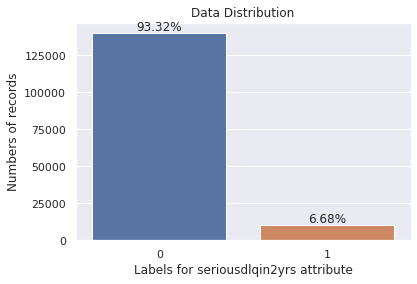

In [115]:
# Graphical representation of the target label percentage 

sns.set()
sns.countplot(training_data.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()

In [116]:
# Missing value
# You will get to know which column has missing value and it's give the count that how many records are missing 
training_data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

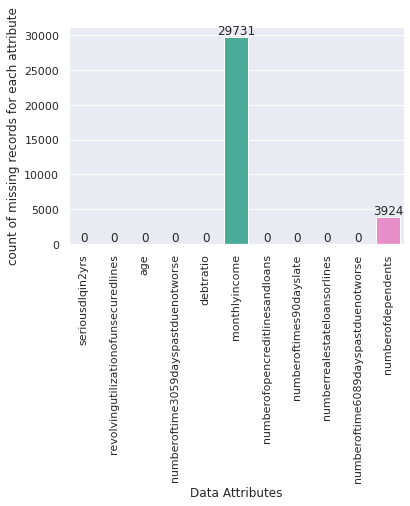

In [117]:

# Graphical representation of the missing values.
x = training_data.columns
y = training_data.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=12, ha='center', va='bottom')
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [118]:
# Actual replacement of the missing value using mean value.
training_data_mean_replace = training_data.fillna((training_data.mean()))
training_data_mean_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
1,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
2,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
3,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
4,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00


In [120]:
# Actual replacement of the missing value using median value.
training_data_median_replace = training_data.fillna((training_data.median()))
training_data_median_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
1,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
2,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
3,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
4,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00


In [123]:
# Correlation 
training_data.fillna((training_data.median()), inplace=True)
# Get the correlation of the training dataset
training_data[training_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.00,-0.01,-0.00,0.00,0.01,-0.01,-0.00,0.01,-0.00,0.00
age,-0.01,1.00,-0.06,0.02,0.03,0.15,-0.06,0.03,-0.06,-0.22
numberoftime3059dayspastduenotworse,-0.00,-0.06,1.00,-0.01,-0.01,-0.06,0.98,-0.03,0.99,-0.00
debtratio,0.00,0.02,-0.01,1.00,-0.02,0.05,-0.01,0.12,-0.01,-0.04
monthlyincome,0.01,0.03,-0.01,-0.02,1.00,0.09,-0.01,0.12,-0.01,0.07
numberofopencreditlinesandloans,-0.01,0.15,-0.06,0.05,0.09,1.00,-0.08,0.43,-0.07,0.07
numberoftimes90dayslate,-0.00,-0.06,0.98,-0.01,-0.01,-0.08,1.00,-0.05,0.99,-0.01
numberrealestateloansorlines,0.01,0.03,-0.03,0.12,0.12,0.43,-0.05,1.00,-0.04,0.13
numberoftime6089dayspastduenotworse,-0.00,-0.06,0.99,-0.01,-0.01,-0.07,0.99,-0.04,1.00,-0.01
numberofdependents,0.00,-0.22,-0.00,-0.04,0.07,0.07,-0.01,0.13,-0.01,1.00


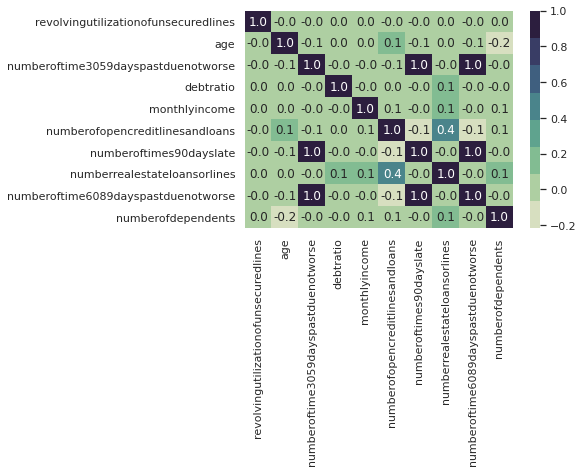

In [124]:
sns.set()
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

In [ ]:
# OUTLIER DETECTION 

In [125]:
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))

# Another percentile based outlier detection method which is based on inter quertile(IQR) range
# import numpy as np
# def outliers_iqr(ys):
#     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))

In [127]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median_y = np.median(points, axis=0)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return modified_z_scores
mad_based_outlier(points=training_data.revolvingutilizationofunsecuredlines)

[array([2.78278459]),
 array([3.65145584]),
 array([2.29190495]),
 array([0.36210795]),
 array([3.42448596]),
 array([0.26828937]),
 array([0.68894439]),
 array([2.72974803]),
 array([-0.16930146]),
 array([0.15910712]),
 array([2.22844922]),
 array([-0.61564377]),
 array([-0.6540526]),
 array([3.68565955]),
 array([-0.61173997]),
 array([1.79295084]),
 array([-0.42334181]),
 array([0.05503917]),
 array([0.30755234]),
 array([2.0400419]),
 array([0.21255918]),
 array([-0.58445947]),
 array([3.84630838]),
 array([-0.35812946]),
 array([-0.48939717]),
 array([1.0825978]),
 array([-0.46267724]),
 array([-0.54459757]),
 array([1.35665969]),
 array([1.08599066]),
 array([2.50060425]),
 array([3.84630838]),
 array([-0.32178897]),
 array([0.14864576]),
 array([2.45174523]),
 array([-0.70112701]),
 array([3.30896727]),
 array([3.84630838]),
 array([0.95248603]),
 array([0.68352477]),
 array([2.57296]),
 array([-0.36962999]),
 array([1.43187889]),
 array([2.56713959]),
 array([0.97631263]),
 ar

In [128]:

def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold

In [133]:
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier
# std_div(data=training_data.age)

In [134]:
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = zip(data.index, x, y, z)
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final
# outlierVote(data=training_data.age)

In [135]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

COMPARING OUTLIER TEST N = 5000

TypeError: ignored

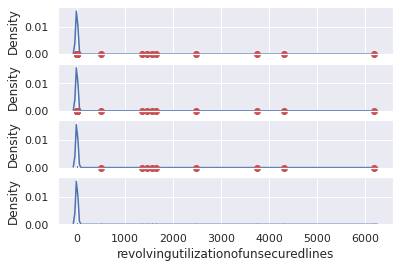

In [136]:
plotOutlier(training_data.revolvingutilizationofunsecuredlines.sample(5000))

TypeError: ignored

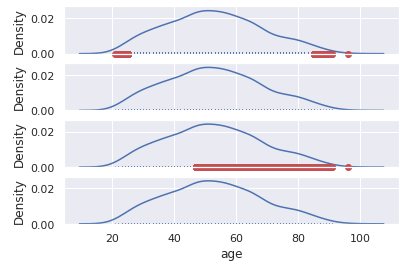

In [137]:
plotOutlier(training_data.age.sample(1000))


TypeError: ignored

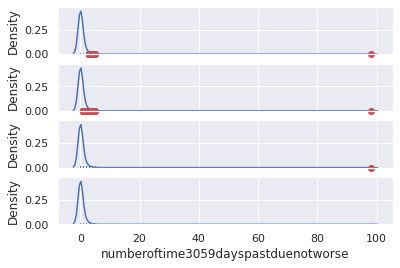

In [138]:
plotOutlier(training_data.numberoftime3059dayspastduenotworse.sample(1000))

TypeError: ignored

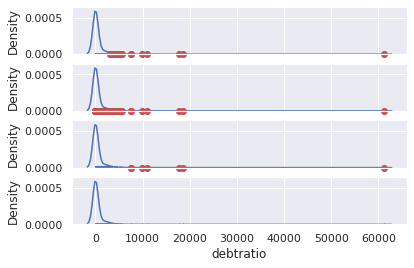

In [139]:
plotOutlier(training_data.debtratio.sample(1000))

TypeError: ignored

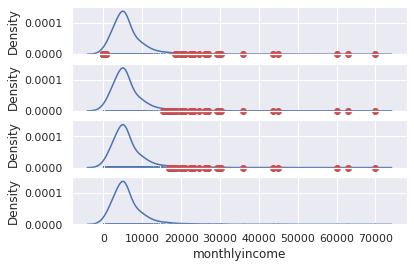

In [140]:
plotOutlier(training_data.monthlyincome.sample(1000))

TypeError: ignored

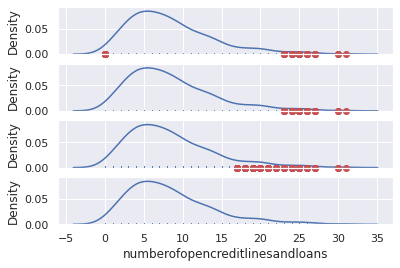

In [141]:
plotOutlier(training_data.numberofopencreditlinesandloans.sample(1000))

TypeError: ignored

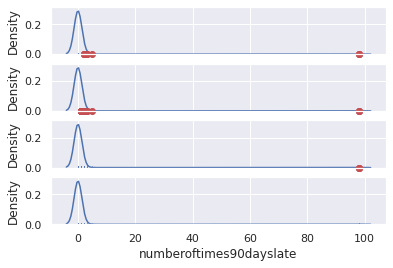

In [142]:
plotOutlier(training_data.numberoftimes90dayslate.sample(1000))

TypeError: ignored

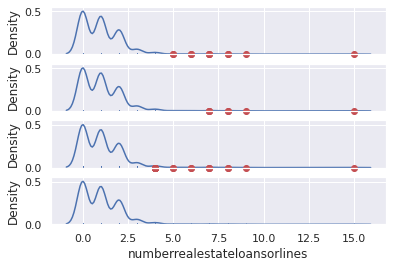

In [143]:
plotOutlier(training_data.numberrealestateloansorlines.sample(1000))

TypeError: ignored

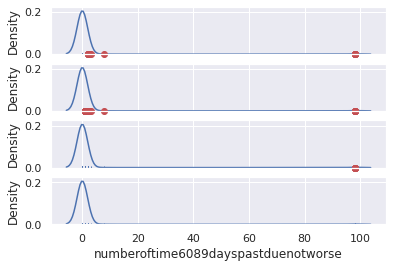

In [144]:
plotOutlier(training_data.numberoftime6089dayspastduenotworse.sample(1000))

TypeError: ignored

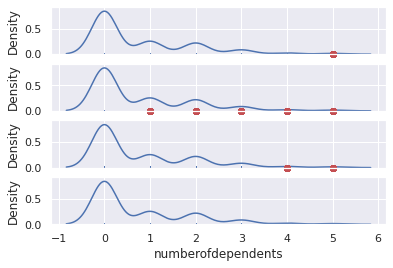

In [145]:
plotOutlier(training_data.numberofdependents.sample(1000))

In [146]:
# OUTLIER 
revNew = []
training_data.revolvingutilizationofunsecuredlines
for val in training_data.revolvingutilizationofunsecuredlines:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)
training_data.revolvingutilizationofunsecuredlines = revNew

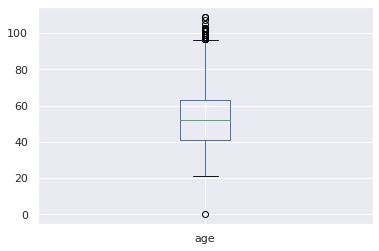

In [147]:
training_data.age.plot.box()

In [148]:
import collections
collections.Counter(training_data.age)

Counter({0: 1,
         21: 183,
         22: 434,
         23: 641,
         24: 816,
         25: 953,
         26: 1193,
         27: 1338,
         28: 1560,
         29: 1702,
         30: 1937,
         31: 2038,
         32: 2050,
         33: 2239,
         34: 2155,
         35: 2246,
         36: 2379,
         37: 2521,
         38: 2631,
         39: 2987,
         40: 3093,
         41: 3122,
         42: 3082,
         43: 3208,
         44: 3294,
         45: 3502,
         46: 3714,
         47: 3719,
         48: 3806,
         49: 3837,
         50: 3753,
         51: 3627,
         52: 3609,
         53: 3648,
         54: 3561,
         55: 3416,
         56: 3589,
         57: 3375,
         58: 3443,
         59: 3280,
         60: 3258,
         61: 3522,
         62: 3568,
         63: 3719,
         64: 3058,
         65: 2594,
         66: 2494,
         67: 2503,
         68: 2235,
         69: 1954,
         70: 1777,
         71: 1646,
         72: 1649,
  

In [149]:
ageNew = []
for val in training_data.age:
    if val > 21:
        ageNew.append(val)
    else:
        ageNew.append(21)
        
training_data.age = ageNew

In [150]:
collections.Counter(training_data.numberoftime3059dayspastduenotworse)

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         10: 4,
         11: 1,
         12: 2,
         13: 1,
         96: 5,
         98: 264})

In [153]:
New = []
med = training_data.numberoftime3059dayspastduenotworse.median()
for val in training_data.numberoftime3059dayspastduenotworse:
    if ((val == 98) | (val == 96)):
        New.append(med)
    else:
        New.append(val)

training_data.numberoftime3059dayspastduenotworse = New

In [154]:
def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict
outlierRatio(training_data.debtratio)

TypeError: ignored

TypeError: ignored

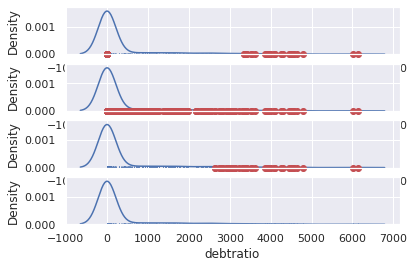

In [155]:
plotOutlier(training_data.debtratio.sample(1000))

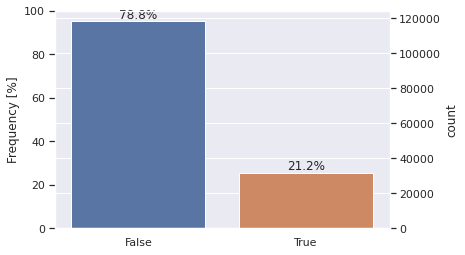

In [156]:

def add_freq():
    ncount = len(training_data)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)
ax = sns.countplot(mad_based_outlier(training_data.debtratio))

add_freq()

In [157]:
minUpperBound = min([val for (val, out) in zip(training_data.debtratio, mad_based_outlier(training_data.debtratio)) if out == True])

In [158]:
newDebtRatio = []
for val in training_data.debtratio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

training_data.debtratio = newDebtRatio

In [159]:
def plotOutlierFree(x):
    fig, axes = plt.subplots(nrows=4)
    nOutliers = []
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        tfOutlier = zip(x, func(x))
        nOutliers.append(len([index for (index, bol) in tfOutlier if bol == True]))
        outlierFree = [index for (index, bol) in tfOutlier if bol == True]
        sns.distplot(outlierFree, ax=ax, rug=True, hist=False)
        
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=15)
    axes[0].set_title('Percentile-based Outliers, removed: {r}'.format(r=nOutliers[0]), **kwargs)
    axes[1].set_title('MAD-based Outliers, removed: {r}'.format(r=nOutliers[1]), **kwargs)
    axes[2].set_title('STD-based Outliers, removed: {r}'.format(r=nOutliers[2]), **kwargs)
    axes[3].set_title('Majority vote based Outliers, removed: {r}'.format(r=nOutliers[3]), **kwargs)
    fig.suptitle('Outlier Removed By Method with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

TypeError: ignored

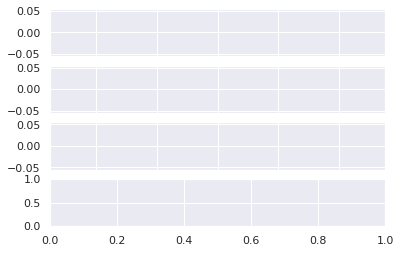

In [160]:
plotOutlierFree(training_data.monthlyincome.sample(1000))

In [162]:

def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

In [163]:
incomeNew = replaceOutlier(training_data.monthlyincome, replace='minUpper')

TypeError: ignored

In [164]:
training_data.monthlyincome = incomeNew

NameError: ignored

In [165]:
collections.Counter(training_data.numberoftimes90dayslate)

Counter({0: 141662,
         1: 5243,
         2: 1555,
         3: 667,
         4: 291,
         5: 131,
         6: 80,
         7: 38,
         8: 21,
         9: 19,
         10: 8,
         11: 5,
         12: 2,
         13: 4,
         14: 2,
         15: 2,
         17: 1,
         96: 5,
         98: 264})

In [166]:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

In [167]:
new = removeSpecificAndPutMedian(training_data.numberoftimes90dayslate)

In [168]:
training_data.numberoftimes90dayslate = new

In [169]:
collections.Counter(training_data.numberrealestateloansorlines)

Counter({0: 56188,
         1: 52338,
         2: 31522,
         3: 6300,
         4: 2170,
         5: 689,
         6: 320,
         7: 171,
         8: 93,
         9: 78,
         10: 37,
         11: 23,
         12: 18,
         13: 15,
         14: 7,
         15: 7,
         16: 4,
         17: 4,
         18: 2,
         19: 2,
         20: 2,
         21: 1,
         23: 2,
         25: 3,
         26: 1,
         29: 1,
         32: 1,
         54: 1})

In [170]:

realNew = []
for val in training_data.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
training_data.numberrealestateloansorlines = realNew

In [171]:
collections.Counter(training_data.numberoftime6089dayspastduenotworse)

Counter({0: 142396,
         1: 5731,
         2: 1118,
         3: 318,
         4: 105,
         5: 34,
         6: 16,
         7: 9,
         8: 2,
         9: 1,
         11: 1,
         96: 5,
         98: 264})

In [172]:
new = removeSpecificAndPutMedian(training_data.numberoftime6089dayspastduenotworse)
training_data.numberoftime6089dayspastduenotworse = new

In [173]:
collections.Counter(training_data.numberofdependents)

Counter({0.0: 90826,
         1.0: 26316,
         2.0: 19522,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         7.0: 51,
         8.0: 24,
         9.0: 5,
         10.0: 5,
         13.0: 1,
         20.0: 1})

In [174]:

depNew = []
for var in training_data.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

In [175]:
training_data.numberofdependents = depNew

In [176]:
# Feature importance 
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.77,45,2.00,0.80,9120.00,13,0.00,6,0.00,2.00
1,0,0.96,40,0.00,0.12,2600.00,4,0.00,0,0.00,1.00
2,0,0.66,38,1.00,0.09,3042.00,2,1.00,0,0.00,0.00
3,0,0.23,30,0.00,0.04,3300.00,5,0.00,0,0.00,0.00
4,0,0.91,49,1.00,0.02,63588.00,7,0.00,1,0.00,0.00


In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
training_data.columns[1:]

Index(['revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

In [ ]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs
features_label = training_data.columns[1:]

# Random forest classifier
forest = RandomForestClassifier (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

In [ ]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Train base model 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# K Neighbor classifier
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [ ]:
knMod.fit(X_train, y_train)

In [ ]:
knMod.score(X_test, y_test)

In [ ]:
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]

In [ ]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

In [ ]:
# Logistic regression
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [ ]:
glmMod.fit(X_train, y_train)

In [ ]:
glmMod.score(X_test, y_test)

In [ ]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]

In [ ]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

In [ ]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [ ]:
adaMod.fit(X_train, y_train)

In [ ]:
adaMod.score(X_test, y_test)

In [ ]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]

In [ ]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

In [ ]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [ ]:
# Gradient boosting classifier 
gbMod.fit(X_train, y_train)

In [ ]:
gbMod.score(X_test, y_test)

In [ ]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]

In [ ]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

In [ ]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [ ]:
rfMod.fit(X_train, y_train)

In [ ]:
rfMod.score(X_test, y_test)

In [ ]:
test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]

In [ ]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

In [ ]:
# Cross validation 

In [ ]:

from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [ ]:
cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc')
cvD

In [ ]:
# Hyper parameter optimization using Randomized search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
# AdaBoost

In [ ]:
adaHyperParams = {'n_estimators': [10,50,100,200,420]}

In [ ]:
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)

In [ ]:
gridSearchAda.best_params_, gridSearchAda.best_score_

In [ ]:
# Gradient boosting 

In [ ]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [ ]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)

In [ ]:
gridSearchGB.best_params_, gridSearchGB.best_score_

In [ ]:
# Train models with help of new hyper parameter

In [ ]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [ ]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [ ]:
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')

In [ ]:
cvDictbestpara

In [ ]:
test_labels=bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]

In [ ]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

In [ ]:
# Feature Transformation

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

In [ ]:
bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)

In [ ]:
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

In [ ]:
cvDictbestpara_transform = cvDictGen(functions=[bestGbModFitted_transformed, bestAdaModFitted_transformed],
                                     scr='roc_auc')

In [ ]:
cvDictbestpara_transform